In [1]:
#Replacing a Black-box model by a Global Single Tree Approximation
#A classification case, with both random and deterministic data generation
#Laurent Deborde 2019 march 23th

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import tree

In [2]:
import matplotlib.pyplot as plt

In [3]:
#load dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape)

(569, 30)


In [4]:
#build dataframe
import pandas as pd
X = pd.DataFrame(cancer['data'])
y = cancer ['target']
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
# separate between train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target, random_state=42)

## First let's try to fit a single tree to the data set

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1,10)}

In [8]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring= 'roc_auc', cv=5,return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Test set score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'max_depth': 2}
Best cross-validation score: 0.933
Test set score: 0.938


#### The optimal max_depth seems to be 2 (quite low). Let's fit a tree of such depth on the whole training set

In [9]:
k=2
clf = DecisionTreeClassifier(max_depth=k)
clf.fit(X_train,y_train)
Acc_appr=clf.score(X_train,y_train)
Acc_test=clf.score(X_test,y_test)
y_pred=clf.predict(X_test)
roc_test=roc_auc_score(y_test, y_pred)
print('for depth',k)
print("accuracy on training set is {:.3f}".format(Acc_appr))
print("accuracy on test set is {:.3f}".format(Acc_test))
print("roc_auc_score on test set is {:.3f}".format(roc_test))

for depth 2
accuracy on training set is 0.958
accuracy on test set is 0.909
roc_auc_score on test set is 0.916


## Let's try a Random forest

In [10]:
param_grid = {'max_depth': [1,2,3,4,5,6,None], 'max_features': [3,5,7,10, None]}
from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring= 'roc_auc', cv=5,return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Test set score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'max_depth': 4, 'max_features': 3}
Best cross-validation score: 0.992
Test set score: 0.994


#### Results are much better than with the single tree. Let's fit the RF on the whole training set with the best parameters

In [11]:
rfc = RandomForestClassifier(max_depth= 6, max_features= 5)
np.set_printoptions(precision=3)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
roc_test=roc_auc_score(y_test, y_pred)
print("accuracy on training set is {:.3f}".format(rfc.score(X_train,y_train)))
print("accuracy on test set is {:.3f}".format(rfc.score(X_test,y_test)))
print("roc_auc_score on test set is {:.3f}".format(roc_test))

accuracy on training set is 0.998
accuracy on test set is 0.958
roc_auc_score on test set is 0.951


#### Significantly above the single tree results.
### Let's try also a Gradient Boosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': [1,3,5,None],'max_features': [1,2,3,5,10,None],'learning_rate' : [0.03,0.1,0.5]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid,scoring= 'roc_auc', cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Test set score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'learning_rate': 0.5, 'max_depth': 3, 'max_features': 2}
Best cross-validation score: 0.996
Test set score: 0.997


In [13]:
# let's fit the best parameters on the whole training set
gbr = GradientBoostingClassifier(max_depth=5, max_features=2,learning_rate=0.03)
np.set_printoptions(precision=3)
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_test)
roc_test=roc_auc_score(y_test, y_pred)
print("accuracy on the training set is {:.3f}".format(gbr.score(X_train,y_train)))
print("accuracy on the test set is {:.3f}".format(gbr.score(X_test,y_test)))
print("roc_auc_score on test set is {:.3f}".format(roc_test))

accuracy on the training set is 1.000
accuracy on the test set is 0.958
roc_auc_score on test set is 0.951


#as an andditionnal measure of prudence, let's try a GB with default parameters : a good result will alleviate fear of overfitting

In [14]:
gbr = GradientBoostingClassifier()
np.set_printoptions(precision=3)
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_test)
roc_test=roc_auc_score(y_test, y_pred)
print("accuracy on the training set is {:.3f}".format(gbr.score(X_train,y_train)))
print("accuracy on the test set is {:.3f}".format(gbr.score(X_test,y_test)))
print("roc_auc_score on test set is {:.3f}".format(roc_test))

accuracy on the training set is 1.000
accuracy on the test set is 0.958
roc_auc_score on test set is 0.947


## Both RF and GB are significantly better than Single Tree. 

## Q : Let's suppose that for some reasons (need for transparency) we are not allowed to use RF, GB, or other good but complex models. Can we use knowledge from the RF and/or GB to build a better single tree ? 
## A :Yes indeed. It's usually done for the purpose of explanation of complex models. 


## We know that a single tree would have better accuracy if trained on a larger number of data. Let's supplement the original dataset by a synthetic one, for which labels will be predicted by the RF or GB, used as a  kind of oracle.  We'll then try to fit a single tree on this larger data set. 

## First, let's generate new "synthetic" data points. 
### We want them to be numerous, and statistically similar to the original points in the dataset (because we suppose our original data set to be similar to the actual data the model will be used on).
### To do so, we will create them according to a multivariate gaussian distribution with parameters estimated on the original data (A more rigorous approach would be to observe the form of the statistic distribution of the data set and infer from it the distribution shape rather than postulating it's gaussian. An even better strategy if possible would be to use real life unlabelled data). 

#### First let's estimate the parameters of the gaussian distribution on the training set (some feel authorized to also use the test set in such procedure as labels are not used here. I prefer to abstain from it as in real life variables values for data to be labeled are generaly not known when building the model)

In [15]:
X_train= pd.DataFrame(X_train)
echmean=X_train.mean(axis=0)
echcov= X_train.cov()

### Let's draw at random a LARGE number of points according to this distribution. Too large a number will impair computation time, to low a number will impair accuracy. 

In [16]:
X_virt= np.random.multivariate_normal(echmean, echcov, 100000, check_valid ='warn')
d_virt=pd.DataFrame(X_virt, columns=X_train.columns)
d_virt.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,14.067675,19.300592,91.541941,649.087369,0.096005,0.103434,0.088955,0.048147,0.180134,0.062773,...,16.198170,25.723314,106.781509,872.694032,0.132472,0.256662,0.278533,0.114228,0.291191,0.084117
std,3.510770,4.456819,24.197999,346.394974,0.013331,0.052730,0.081247,0.038658,0.027660,0.007231,...,4.814267,6.320987,33.482926,560.245736,0.022580,0.162509,0.220278,0.067430,0.065381,0.018742
min,-1.481427,-0.222992,-14.664232,-931.034639,0.037725,-0.124172,-0.275121,-0.118116,0.056892,0.030455,...,-4.530183,0.843734,-39.059771,-1555.284259,0.016083,-0.427943,-0.710094,-0.211530,0.007292,0.007049
25%,11.704351,16.284750,75.281048,415.792452,0.087040,0.067982,0.034348,0.022155,0.161594,0.057927,...,12.955986,21.457888,84.287607,496.821369,0.117253,0.147331,0.129544,0.068758,0.247017,0.071494
50%,14.058694,19.295669,91.482899,647.892716,0.096009,0.103238,0.088538,0.047996,0.180270,0.062766,...,16.187589,25.712022,106.705078,871.826743,0.132415,0.256138,0.277680,0.113997,0.291280,0.084129
75%,16.424010,22.308505,107.765980,881.675112,0.104929,0.138921,0.143542,0.073964,0.198700,0.067627,...,19.433886,29.988724,129.262557,1249.027114,0.147670,0.366566,0.426940,0.159582,0.335300,0.096780
max,29.727932,40.427051,198.370989,2232.640872,0.151028,0.320930,0.473286,0.219552,0.297505,0.094539,...,38.120567,52.757474,256.467702,3502.864380,0.226934,0.938227,1.319530,0.378652,0.583494,0.162671


###  Let's compute the prediction given by our black box oracle (GB with default parameters) on those points. 

In [17]:
y_virt=gbr.predict(d_virt)

### Let's now fit a single tree on this large number of synthetic points (we can/should add the original training set to this synthetic training set, but as the later is much larger than the former it's unlikely to make any significant difference). Warning : computation may be a bit lengthy

In [18]:
 from sklearn.model_selection import cross_val_score
for i in range (4,10):
    clf = DecisionTreeClassifier(max_depth=i,random_state=42)
    score=cross_val_score(clf,d_virt,y_virt,cv=5,scoring= 'roc_auc').mean() 
    print("k=",i,"average cross-validation score: {:.3f}".format(score))    


k= 4 average cross-validation score: 0.983
k= 5 average cross-validation score: 0.988
k= 6 average cross-validation score: 0.990
k= 7 average cross-validation score: 0.991
k= 8 average cross-validation score: 0.990
k= 9 average cross-validation score: 0.985


### Our trees, (especially with the optimal depth of 7) fit well the virtual training set. But do they fit the real data ?

In [19]:
k=7
clf= DecisionTreeClassifier(max_depth=k)
clf.fit(d_virt,y_virt)
Acc_appr=clf.score(X_train,y_train)
Acc_test=clf.score(X_test,y_test)
y_pred=clf.predict(X_test)
roc_test=roc_auc_score(y_test, y_pred)
print('for depth',k)
print("accuracy on training set is {:.3f}".format(Acc_appr))
print("accuracy on test set is {:.3f}".format(Acc_test))
print("roc_auc_score on test set is {:.3f}".format(roc_test))

for depth 7
accuracy on training set is 0.984
accuracy on test set is 0.951
roc_auc_score on test set is 0.946


## Good ! accuracy and roc_auc_score on test set are significantly above the initial tree scores (albeit at the price of increased complexity/depth). Still they are under the GB scores, which was expected.

### Let's try with Random Forest now

In [20]:
z_virt=rfc.predict(d_virt)

In [21]:
for i in range (5,11):
    tree1 = DecisionTreeClassifier(max_depth=i,random_state=42)
    score=cross_val_score(tree1,d_virt,z_virt,scoring= 'roc_auc',cv=5).mean() 
    print("k=",i,"average cross-validation score: {:.3f}".format(score))

k= 5 average cross-validation score: 0.994
k= 6 average cross-validation score: 0.995
k= 7 average cross-validation score: 0.995
k= 8 average cross-validation score: 0.992
k= 9 average cross-validation score: 0.985
k= 10 average cross-validation score: 0.978


In [22]:
# again, let's try this tree on the original set
k=5
tree1 = DecisionTreeClassifier(max_depth=k)
tree1.fit(d_virt,y_virt)
Acc_appr=tree1.score(X_train,y_train)
Acc_test=tree1.score(X_test,y_test)
y_pred=tree1.predict(X_test)
roc_test=roc_auc_score(y_test, y_pred)
print('for depth',k)
print("accuracy on training set is {:.3f}".format(Acc_appr))
print("accuracy on test set is {:.3f}".format(Acc_test))
print("roc_auc_score on test set is {:.3f}".format(roc_test))

for depth 5
accuracy on training set is 0.986
accuracy on test set is 0.951
roc_auc_score on test set is 0.946


### Again, significant improvement over the initial tree. 

### For the sake of illustration, let's now try a different strategy to generate artificial data. Rather than gaussian random draws, we will use a deterministic procedure : take the middle point between each pair of initial data

In [23]:
long=len(X_train)
court=len(X_train.columns)
X_virt=np.zeros((long*long,court))
X_val=X_train.values

In [24]:
for i in range(long):
    for j in range(long):
        for k in range(court):
            X_virt[i+long*j,k]=(X_val[i,k]+X_val[j,k])/2

In [25]:
d_virt=pd.DataFrame(X_virt, columns=X_train.columns)
d_virt.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,181476.000000,181476.000000,181476.000000,181476.000000,181476.000000,181476.000000,181476.000000,181476.000000,181476.000000,181476.000000,...,181476.000000,181476.000000,181476.000000,181476.000000,181476.000000,181476.000000,181476.000000,181476.000000,181476.000000,181476.000000
mean,14.075202,19.295047,91.592911,649.627230,0.096018,0.103460,0.088931,0.048211,0.180203,0.062779,...,16.202542,25.708263,106.803732,872.524413,0.132365,0.256041,0.277706,0.114156,0.291210,0.084079
std,2.478274,3.141389,17.081338,244.329577,0.009426,0.037197,0.057164,0.027193,0.019525,0.005111,...,3.396074,4.456901,23.624039,394.905197,0.015997,0.114667,0.154931,0.047498,0.046171,0.013242
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,12.255000,17.075000,78.935000,468.187500,0.089445,0.075935,0.043310,0.025865,0.166850,0.059140,...,13.635000,22.535000,88.855000,577.000000,0.121400,0.172050,0.161449,0.077410,0.260650,0.074765
50%,13.705000,19.020000,88.955000,590.725000,0.095680,0.098025,0.078720,0.044595,0.178600,0.062025,...,15.565000,25.435000,102.650000,761.850000,0.131908,0.236850,0.255250,0.111263,0.285025,0.081785
75%,15.680000,21.230000,102.560000,796.400000,0.102185,0.124925,0.122825,0.064300,0.191650,0.065595,...,18.350000,28.545000,121.450000,1087.300000,0.142700,0.316500,0.371146,0.145890,0.313800,0.090865
max,28.110000,39.280000,188.500000,2499.000000,0.142500,0.345400,0.426400,0.191300,0.304000,0.097440,...,33.130000,49.540000,229.300000,3432.000000,0.218400,1.058000,1.252000,0.291000,0.663800,0.207500


In [26]:
#let's label those points with the black box prediction
y_virt=gbr.predict(d_virt)

In [27]:
#as above, let(s fit a tree on those data
for i in range (4,10):
    clf = DecisionTreeClassifier(max_depth=i,random_state=42)
    score=cross_val_score(clf,d_virt,y_virt,cv=5,scoring= 'roc_auc').mean() 
    print("k=",i,"average cross-validation score: {:.3f}".format(score))    

k= 4 average cross-validation score: 0.992
k= 5 average cross-validation score: 0.995
k= 6 average cross-validation score: 0.996
k= 7 average cross-validation score: 0.997
k= 8 average cross-validation score: 0.997
k= 9 average cross-validation score: 0.997


In [28]:
#hour of truth : let's look at the predicting ability of this new tree : 
k=8
clf = DecisionTreeClassifier(max_depth=k)
clf.fit(d_virt,y_virt)
Acc_appr=clf.score(X_train,y_train)
Acc_test=clf.score(X_test,y_test)
y_pred=clf.predict(X_test)
roc_test=roc_auc_score(y_test, y_pred)
print('for depth',k)
print("accuracy on training set is {:.3f}".format(Acc_appr))
print("accuracy on test set is {:.3f}".format(Acc_test))
print("roc_auc_score on test set is {:.3f}".format(roc_test))

for depth 8
accuracy on training set is 0.988
accuracy on test set is 0.958
roc_auc_score on test set is 0.955


In [29]:
X_test[0]

array([1.275e+01, 1.670e+01, 8.251e+01, 4.938e+02, 1.125e-01, 1.117e-01,
       3.880e-02, 2.995e-02, 2.120e-01, 6.623e-02, 3.834e-01, 1.003e+00,
       2.495e+00, 2.862e+01, 7.509e-03, 1.561e-02, 1.977e-02, 9.199e-03,
       1.805e-02, 3.629e-03, 1.445e+01, 2.174e+01, 9.363e+01, 6.241e+02,
       1.475e-01, 1.979e-01, 1.423e-01, 8.045e-02, 3.071e-01, 8.557e-02])

In [30]:
y_test[0:10]

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [31]:
from art.attacks.evasion import DecisionTreeAttack
from art.estimators.classification import SklearnClassifier

In [43]:
clf_art = SklearnClassifier(clf)
attack = DecisionTreeAttack(clf_art)
adv = attack.generate(X_test)

Decision tree attack: 100%|██████████| 143/143 [00:00<00:00, 288.46it/s]


In [44]:
clf.predict(adv)

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [45]:
y_test

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [50]:
np.linalg.norm(clf.predict(adv)-y_test,ord=1)

137.0

In [47]:
rfc.predict(adv)

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
np.linalg.norm(rfc.predict(adv)-y_test,ord=1)

6.0

In [41]:
rfc.predict_proba(X_test[0].reshape(1,-1))

array([[0.034, 0.966]])

In [42]:
np.linalg.norm(X_test[0]-adv,ord=1)

8.83349771118165

### Quite good ! 

In [32]:
n_nodes = clf.tree_.node_count # total number of nodes（int）
children_left = clf.tree_.children_left # child node number at the left side of each node（list）
children_right = clf.tree_.children_right # child node number at the right side of each node（list）
feature = clf.tree_.feature # feature column number of each node（list）
threshold = clf.tree_.threshold # feature threshold of each node（list）

In [33]:
feature

array([22,  7, 22, 27, 13, 27, 27, 23, -2, -2, 21, -2, -2, 23, 21, -2, -2,
       21, -2, -2, 25,  1, 25, -2, -2,  8, -2, -2, 17, -2,  3, -2, -2, -2,
       24, 20,  1, 27, 13, -2, -2, -2,  7, 23, -2, -2,  3, -2, -2,  6, 21,
       10, -2, -2, -2, 11,  7, -2, -2, -2, 21, 27, 13, 20, -2, -2,  6, -2,
       -2, 21, 25, -2, -2, 23, -2, -2,  7, 20, 21, -2, -2,  6, -2, -2, 21,
       11, -2, -2, 22, -2, -2, 22, 27, 21, 23, 22,  1, -2, -2, 21, -2, -2,
       27, 21, -2, -2, 24, -2, -2, 23, 10, -2, -2, 27, 23, -2, -2, 23, -2,
       -2, 27, 20, 21, 23, -2, -2, 11, -2, -2, 21,  1, -2, -2, 23, -2, -2,
        1, -2, 22, 22, -2, -2, 21, -2, -2, 21, 27, 21, 23,  7, -2, -2, -2,
       13, 27, -2, -2, 24, -2, -2, 24,  7, 12, -2, -2, 17, -2, -2, 21,  4,
       -2, -2, 20, -2, -2, 24,  1,  3, 27, -2, -2, 13, -2, -2,  4, 27, -2,
       -2,  6, -2, -2, 27, 13,  1, -2, -2, 23, -2, -2,  1, 18, -2, -2, 21,
       -2, -2, 23,  7, 24, 20, 21, 17, 27, -2, -2, -2,  7, 27, -2, -2, 14,
       -2, -2,  6,  1, 18

In [34]:
def terminal(clf):
    threshold = clf.tree_.feature
    terminal_nodes = [i for i,val in enumerate(threshold==-2) if val]
    
    return terminal_nodes

def node_path(clf,X):
    path = clf.decision_path(X.reshape(1,-1)).nonzero()[1]
    
    return path

In [35]:
def delta_n(clf,X):
    path = node_path(clf,X)
    feature_list = clf.tree_.feature # feature column number of each node（list）
    threshold_list = clf.tree_.threshold # feature threshold of each node（list）
    delta = []
    for i in path[:-1]:
        select_feature = feature_list[i]
        select_thres = threshold_list[i]
        d = select_thres - X[select_feature]
        delta = np.append(delta,d)
    
    return delta

def untargeted_attack_dt(clf,X,y,eps,N):
    terminal_nodes = terminal(clf)
    feature_list = clf.tree_.feature # feature column number of each node（list）
    threshold_list = clf.tree_.threshold # feature threshold of each node（list）
    delta = delta_n(clf,X)
    clf_predict = clf.predict(X.reshape(1,-1))
    X_new = np.array(X)
    count = 0
    while (clf_predict == y and count<N):
        path = node_path(clf,X_new)
        select_node = path[:-1][delta.argmin()]
        select_feature = feature_list[select_node]
        d = delta.min()
        X_new[select_feature]=threshold_list[select_node]+eps*np.sign(d)
        #print(delta[-1])
        clf_predict = clf.predict(X_new.reshape(1,-1))
        delta = delta_n(clf,X_new)
        count = count + 1
    if (count==N):
        X_new = np.array(X)
        count = 0
        while (clf_predict == y and count<N):
            path = node_path(clf,X_new)
            select_node = path[:-1][delta.argsort()[1]]
            d = delta[delta.argsort()[1]]
            select_feature = feature_list[select_node]
            X_new[select_feature]=threshold_list[select_node]+eps*np.sign(d)
            #print(delta[-1])
            clf_predict = clf.predict(X_new.reshape(1,-1))
            delta = delta_n(clf,X_new)
            count = count + 1
    if (count==N):
        X_new = np.array(X)
        count = 0
        while (clf_predict == y and count<N):
            path = node_path(clf,X_new)
            select_node = path[:-1][delta.argsort()[2]]
            d = delta[delta.argsort()[2]]
            select_feature = feature_list[select_node]
            X_new[select_feature]=threshold_list[select_node]+eps*np.sign(d)
            #print(delta[-1])
            clf_predict = clf.predict(X_new.reshape(1,-1))
            delta = delta_n(clf,X_new)
            count = count + 1     
    return X_new

In [36]:
for i in range(0,143):
    X_new= untargeted_attack_dt(clf,X_test[i],y_test[i],10e-8,10)
    if (rfc.predict(X_test[i].reshape(1,-1))!=rfc.predict(X_new.reshape(1,-1))):
        print("Sample: ",i)
        print("True value is: ", y_test[i])
        print("Evasive Example Prediction: ",clf.predict(X_new.reshape(1,-1)))
        print("Decision Tree Prediction on Original: ",clf.predict(X_test[i].reshape(1,-1)))
        print("Random Forest Prediction on Original: ",rfc.predict(X_test[i].reshape(1,-1)))
        print("Evasive Example Random Forest Prediction: ",rfc.predict(X_new.reshape(1,-1)))
        #print(node_path(clf,X_test[i]))
        #print(node_path(clf,X_new))
        print(np.linalg.norm(X_test[i]-X_new,ord=1))

Sample:  18
True value is:  1
Evasive Example Prediction:  [0]
Decision Tree Prediction on Original:  [1]
Random Forest Prediction on Original:  [1]
Evasive Example Random Forest Prediction:  [0]
43.337211380273295
Sample:  88
True value is:  1
Evasive Example Prediction:  [0]
Decision Tree Prediction on Original:  [1]
Random Forest Prediction on Original:  [1]
Evasive Example Random Forest Prediction:  [0]
206.37500620351557


In [37]:
count = 0
for i in range(0,143):
    X_new= untargeted_attack_dt(clf,X_test[i],y_test[i],10e-8,10)
    if (clf.predict(X_test[i].reshape(1,-1))!=clf.predict(X_new.reshape(1,-1))):
        count = count + 1
        print("Sample: ",i)
        print("True value is: ", y_test[i])
        print("Evasive Example Prediction: ",clf.predict(X_new.reshape(1,-1)))
        #print(clf.predict(X_test[i].reshape(1,-1)))
        print("Random Forest Prediction: ",rfc.predict(X_new.reshape(1,-1)))
        #print(node_path(clf,X_test[i]))
        #print(node_path(clf,X_new))
        print(np.linalg.norm(X_test[i]-X_new,ord=1))
print("Total Number of Evasive Examples: ",count)

Sample:  0
True value is:  1
Evasive Example Prediction:  [0]
Random Forest Prediction:  [1]
0.09992510232458116
Sample:  1
True value is:  0
Evasive Example Prediction:  [1]
Random Forest Prediction:  [0]
483.72248249980464
Sample:  2
True value is:  1
Evasive Example Prediction:  [0]
Random Forest Prediction:  [1]
114.12501841054689
Sample:  3
True value is:  1
Evasive Example Prediction:  [0]
Random Forest Prediction:  [1]
0.05128260279426575
Sample:  4
True value is:  0
Evasive Example Prediction:  [1]
Random Forest Prediction:  [1]
114.64998178945314
Sample:  5
True value is:  0
Evasive Example Prediction:  [1]
Random Forest Prediction:  [0]
1577.5474887033201
Sample:  6
True value is:  0
Evasive Example Prediction:  [1]
Random Forest Prediction:  [0]
33.890001191821284
Sample:  7
True value is:  0
Evasive Example Prediction:  [1]
Random Forest Prediction:  [0]
1095.642486109326
Sample:  8
True value is:  0
Evasive Example Prediction:  [1]
Random Forest Prediction:  [0]
654.817479

Sample:  79
True value is:  1
Evasive Example Prediction:  [0]
Random Forest Prediction:  [1]
0.16648510232458114
Sample:  80
True value is:  1
Evasive Example Prediction:  [0]
Random Forest Prediction:  [1]
0.09774510232458115
Sample:  81
True value is:  1
Evasive Example Prediction:  [0]
Random Forest Prediction:  [1]
0.12449510232458115
Sample:  82
True value is:  1
Evasive Example Prediction:  [0]
Random Forest Prediction:  [1]
0.062375102324581155
Sample:  83
True value is:  1
Evasive Example Prediction:  [0]
Random Forest Prediction:  [1]
0.08784029796271323
Sample:  84
True value is:  0
Evasive Example Prediction:  [1]
Random Forest Prediction:  [0]
374.3749829812744
Sample:  85
True value is:  1
Evasive Example Prediction:  [0]
Random Forest Prediction:  [1]
0.09377510232458115
Sample:  86
True value is:  0
Evasive Example Prediction:  [1]
Random Forest Prediction:  [0]
393.01747990581055
Sample:  87
True value is:  1
Evasive Example Prediction:  [0]
Random Forest Prediction:  

In [38]:
def untargeted_attack_dt_mod(clf,X,y,eps,N):
    terminal_nodes = terminal(clf)
    feature_list = clf.tree_.feature # feature column number of each node（list）
    threshold_list = clf.tree_.threshold # feature threshold of each node（list）
    delta = delta_n(clf,X)
    clf_predict = clf.predict(X.reshape(1,-1))
    X_new = np.array(X)
    count = 0
    while (clf_predict == y and count<N):
        path = node_path(clf,X_new)
        select_node = path[-2]
        select_feature = feature_list[select_node]
        X_new[select_feature]=threshold_list[select_node]+eps*np.sign(delta[-1])
        clf_predict = clf.predict(X_new.reshape(1,-1))
        delta = delta_n(clf,X_new)
        count = count + 1
        
    return X_new,count

In [39]:
for i in range(0,50):
    X_new,count = untargeted_attack_dt_mod(clf,X_test[i],y_test[i],10e-5,500)
    print("Sample: ",i)
    print("True value is: ", y_test[i])
    print("Count:",count)
    print("Evasive Example Prediction: ",clf.predict(X_new.reshape(1,-1)))
    print(clf.predict(X_test[i].reshape(1,-1)))
    print(rfc.predict(X_new.reshape(1,-1)))
    print(node_path(clf,X_test[i]))
    print(node_path(clf,X_new))

Sample:  0
True value is:  1
Count: 500
Evasive Example Prediction:  [1]
[1]
[1]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7 8]
Sample:  1
True value is:  0
Count: 1
Evasive Example Prediction:  [1]
[0]
[0]
[  0 206 306 350 354 366 374 376 378]
[  0 206 306 350 354 366 374 376 377]
Sample:  2
True value is:  1
Count: 1
Evasive Example Prediction:  [0]
[1]
[1]
[  0 206 207 208 209 210 211 212 213]
[  0 206 207 208 209 210 211 212 214]
Sample:  3
True value is:  1
Count: 500
Evasive Example Prediction:  [1]
[1]
[1]
[ 0  1 91 92 93 94 95 96 97]
[ 0  1 91 92 93 94 95 96 97]
Sample:  4
True value is:  0
Count: 500
Evasive Example Prediction:  [0]
[0]
[1]
[  0   1  91  92  93 109 113 117 119]
[  0   1  91  92  93 109 113 117 119]
Sample:  5
True value is:  0
Count: 1
Evasive Example Prediction:  [1]
[0]
[0]
[  0 206 306 350 354 366 374 376 378]
[  0 206 306 350 354 366 374 376 377]
Sample:  6
True value is:  0
Count: 500
Evasive Example Prediction:  [0]
[0]
[0]
[  0   1  91 145 175 191 199 203 205]

[Text(176.29155405405405, 205.35999999999999, 'X[22] <= 108.358\ngini = 0.49\nsamples = 181476\nvalue = [77829, 103647]'),
 Text(83.66858108108107, 181.2, 'X[7] <= 0.052\ngini = 0.119\nsamples = 106431\nvalue = [6758, 99673]'),
 Text(34.12094594594594, 157.04, 'X[22] <= 102.462\ngini = 0.035\nsamples = 93984\nvalue = [1679, 92305]'),
 Text(16.33783783783784, 132.88, 'X[27] <= 0.18\ngini = 0.007\nsamples = 83734\nvalue = [286, 83448]'),
 Text(15.332432432432432, 108.72, 'X[13] <= 57.641\ngini = 0.006\nsamples = 83700\nvalue = [252, 83448]'),
 Text(8.043243243243243, 84.56, 'X[27] <= 0.161\ngini = 0.004\nsamples = 83087\nvalue = [163, 82924]'),
 Text(4.021621621621621, 60.400000000000006, 'X[27] <= 0.136\ngini = 0.003\nsamples = 82822\nvalue = [117, 82705]'),
 Text(2.0108108108108107, 36.24000000000001, 'X[23] <= 813.25\ngini = 0.001\nsamples = 81342\nvalue = [52, 81290]'),
 Text(1.0054054054054054, 12.079999999999984, 'gini = 0.001\nsamples = 80822\nvalue = [28, 80794]'),
 Text(3.016216

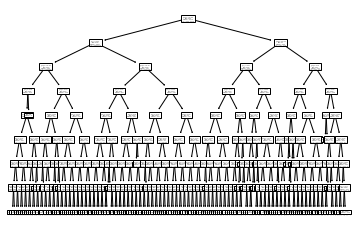

In [40]:
tree.plot_tree(clf)

In [41]:
def find_closest(clf,X,Xtr):
    N = len(Xtr)
    class_init = clf.predict(X.reshape(1,-1))
    count = 0
    X_sub = []
    for i in range(0,N):
        class_pred = clf.predict(np.array(Xtr.iloc[i]).reshape(1,-1))
        if class_pred != class_init:
            if count==0:
                X_sub = [np.array(Xtr.iloc[i])]
                count = count + 1
            else:
                X_sub = np.append(X_sub,[np.array(Xtr.iloc[i])],axis=0)
                count = count + 1
    d = []
    M = len(X_sub)
    for i in range(0,M):
        dif = np.linalg.norm(X-X_sub[i],ord=0)
        d = np.append(d,dif)
    closest = X_sub[d.argmin()]
    
    return closest

In [42]:
closest = find_closest(clf,X_test[0],X_train)
closest

array([1.822e+01, 1.887e+01, 1.187e+02, 1.027e+03, 9.746e-02, 1.117e-01,
       1.130e-01, 7.950e-02, 1.807e-01, 5.664e-02, 4.041e-01, 5.503e-01,
       2.547e+00, 4.890e+01, 4.821e-03, 1.659e-02, 2.408e-02, 1.143e-02,
       1.275e-02, 2.451e-03, 2.184e+01, 2.500e+01, 1.409e+02, 1.485e+03,
       1.434e-01, 2.763e-01, 3.853e-01, 1.776e-01, 2.812e-01, 8.198e-02])

In [52]:
def untargeted_closest_dt_attack(clf,X,X_t,eps):
    closest = find_closest(clf,X,X_t)
    target_path = node_path(clf,closest)
    feature_list = clf.tree_.feature
    threshold_list = clf.tree_.threshold
    X_new = np.array(X)
    for select_node in target_path[:-1]:
        select_feature = feature_list[select_node]
        delta = closest[select_feature] - threshold_list[select_node]
        X_new[select_feature]=threshold_list[select_node]+eps*np.sign(delta)
        
    return X_new, closest

In [124]:
count = 0
for i in range(0,143):
    X_new, closest= untargeted_closest_dt_attack(clf,X_test[i],X_train,eps=10e-5)
    if (clf.predict(X_test[i].reshape(1,-1))!=clf.predict(X_new.reshape(1,-1))):
        count = count + 1
        print("Sample: ",i)
        print("True value is: ", y_test[i])
        print("Decision Tree Prediction Original: ",clf.predict(X_test[i].reshape(1,-1)))
        print("Random Forest Prediction Original: ",rfc.predict(X_test[i].reshape(1,-1)))
        print("DT Evasive Example Prediction: ",clf.predict(X_new.reshape(1,-1)))
        print("RF Evasive Example Prediction: ",rfc.predict_proba(X_new.reshape(1,-1)))
        #print("Original Sample DT Path: ",node_path(clf,X_test[i]))
        #print("Evasive Sample DT Path: ",node_path(clf,X_new))
        #print("Closest Opposite Class to Original DT Path: ", node_path(clf,closest))
        print(np.linalg.norm(X_test[i]-X_new,ord=1))
print("Total Number of Evasive Examples: ",count)

Sample:  0
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]
RF Evasive Example Prediction:  [[0.316 0.684]]
327.70860531540507
Sample:  1
True value is:  0
Decision Tree Prediction Original:  [0]
Random Forest Prediction Original:  [0]
DT Evasive Example Prediction:  [1]
RF Evasive Example Prediction:  [[0.834 0.166]]
610.802831352993
Sample:  2
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]
RF Evasive Example Prediction:  [[0.37 0.63]]
117.97856605825727
Sample:  3
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]
RF Evasive Example Prediction:  [[0.449 0.551]]
276.77160531540505
Sample:  4
True value is:  0
Decision Tree Prediction Original:  [0]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [1]
RF Evasive 

Sample:  39
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]
RF Evasive Example Prediction:  [[0.22 0.78]]
17.75191926148057
Sample:  40
True value is:  0
Decision Tree Prediction Original:  [0]
Random Forest Prediction Original:  [0]
DT Evasive Example Prediction:  [1]
RF Evasive Example Prediction:  [[0.803 0.197]]
1923.7365162664664
Sample:  41
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]
RF Evasive Example Prediction:  [[0.257 0.743]]
566.4194253154051
Sample:  42
True value is:  0
Decision Tree Prediction Original:  [0]
Random Forest Prediction Original:  [0]
DT Evasive Example Prediction:  [1]
RF Evasive Example Prediction:  [[0.707 0.293]]
1021.8640162664664
Sample:  43
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]
RF Eva

Sample:  79
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]
RF Evasive Example Prediction:  [[0.216 0.784]]
702.6258598576294
Sample:  80
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]
RF Evasive Example Prediction:  [[0.362 0.638]]
429.9697353154051
Sample:  81
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]
RF Evasive Example Prediction:  [[0.304 0.696]]
647.1093748576415
Sample:  82
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]
RF Evasive Example Prediction:  [[0.383 0.617]]
321.0934403178084
Sample:  83
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]
RF Eva

Sample:  119
True value is:  0
Decision Tree Prediction Original:  [0]
Random Forest Prediction Original:  [0]
DT Evasive Example Prediction:  [1]
RF Evasive Example Prediction:  [[0.782 0.218]]
134.86639626646632
Sample:  120
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]
RF Evasive Example Prediction:  [[0.298 0.702]]
564.3223503178084
Sample:  121
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]
RF Evasive Example Prediction:  [[0.247 0.753]]
254.5669053154051
Sample:  122
True value is:  0
Decision Tree Prediction Original:  [0]
Random Forest Prediction Original:  [0]
DT Evasive Example Prediction:  [1]
RF Evasive Example Prediction:  [[0.832 0.168]]
1237.7677962664663
Sample:  123
True value is:  1
Decision Tree Prediction Original:  [1]
Random Forest Prediction Original:  [1]
DT Evasive Example Prediction:  [0]

In [161]:
def rf_attack(rfc,X,X_tr,eps):
    print("RFC Prediction: ",rfc.predict(X.reshape(1,-1)))
    N_tree = rfc.n_estimators
    delta_evasive = [np.zeros(30)]
    X_evasive = [np.array(X)]
    for i in range(0,N_tree):
        X_new = np.array(X)
        clf = rfc.estimators_[i]
        closest = find_closest(clf,X,X_tr)
        target_path = node_path(clf,closest)
        feature_list = clf.tree_.feature
        threshold_list = clf.tree_.threshold
        for select_node in target_path[:-1]:
            select_feature = feature_list[select_node]
            delta = closest[select_feature] - threshold_list[select_node]
            X_new[select_feature]=threshold_list[select_node]+eps*np.sign(delta)
        chg = X_new.reshape(1,-1)-X.reshape(1,-1)
        delta_evasive = np.append(delta_evasive,np.array(chg),axis=0)
        X_evasive = np.append(X_evasive,[np.array(X_new)],axis=0)
        print("Tree ", i, " Prediction: ",clf.predict(X_new.reshape(1,-1)))
        print("RFC Prediction on Sample ",i," is: ", rfc.predict_proba(X_new.reshape(1,-1)))
    return X_evasive, delta_evasive

In [163]:
X_evasive, delta_evasive = rf_attack(rfc,X_test[0],X_train,eps=10e-4)

RFC Prediction:  [1]
Tree  0  Prediction:  [0.]
RFC Prediction on Sample  0  is:  [[0.048 0.952]]
Tree  1  Prediction:  [0.]
RFC Prediction on Sample  1  is:  [[0.058 0.942]]
Tree  2  Prediction:  [0.]
RFC Prediction on Sample  2  is:  [[0.144 0.856]]
Tree  3  Prediction:  [0.]
RFC Prediction on Sample  3  is:  [[0.12 0.88]]
Tree  4  Prediction:  [0.]
RFC Prediction on Sample  4  is:  [[0.155 0.845]]
Tree  5  Prediction:  [0.]
RFC Prediction on Sample  5  is:  [[0.038 0.962]]
Tree  6  Prediction:  [0.]
RFC Prediction on Sample  6  is:  [[0.16 0.84]]
Tree  7  Prediction:  [0.]
RFC Prediction on Sample  7  is:  [[0.141 0.859]]
Tree  8  Prediction:  [0.]
RFC Prediction on Sample  8  is:  [[0.161 0.839]]
Tree  9  Prediction:  [0.]
RFC Prediction on Sample  9  is:  [[0.134 0.866]]
Tree  10  Prediction:  [0.]
RFC Prediction on Sample  10  is:  [[0.233 0.767]]
Tree  11  Prediction:  [0.]
RFC Prediction on Sample  11  is:  [[0.203 0.797]]
Tree  12  Prediction:  [0.]
RFC Prediction on Sample  1

In [148]:
rfc.predict_proba(np.mean(X_evasive[1:],axis=0).reshape(1,-1))

array([[0.028, 0.972]])

In [149]:
for i in range(0,N_tree):
    print("Sample ",i, " Prediction: ",rfc.predict_proba(X_evasive[i+1].reshape(1,-1)))

Sample  0  Prediction:  [[0.048 0.952]]
Sample  1  Prediction:  [[0.058 0.942]]
Sample  2  Prediction:  [[0.144 0.856]]
Sample  3  Prediction:  [[0.12 0.88]]
Sample  4  Prediction:  [[0.155 0.845]]
Sample  5  Prediction:  [[0.038 0.962]]
Sample  6  Prediction:  [[0.16 0.84]]
Sample  7  Prediction:  [[0.141 0.859]]
Sample  8  Prediction:  [[0.161 0.839]]
Sample  9  Prediction:  [[0.134 0.866]]
Sample  10  Prediction:  [[0.233 0.767]]
Sample  11  Prediction:  [[0.203 0.797]]
Sample  12  Prediction:  [[0.101 0.899]]
Sample  13  Prediction:  [[0.123 0.877]]
Sample  14  Prediction:  [[0.133 0.867]]
Sample  15  Prediction:  [[0.111 0.889]]
Sample  16  Prediction:  [[0.151 0.849]]
Sample  17  Prediction:  [[0.128 0.872]]
Sample  18  Prediction:  [[0.038 0.962]]
Sample  19  Prediction:  [[0.049 0.951]]
Sample  20  Prediction:  [[0.182 0.818]]
Sample  21  Prediction:  [[0.161 0.839]]
Sample  22  Prediction:  [[0.08 0.92]]
Sample  23  Prediction:  [[0.108 0.892]]
Sample  24  Prediction:  [[0.169

In [152]:
np.linalg.norm(X_test[0]-np.mean(X_evasive[1:],axis=0),ord=1)

82.74354080839011

In [165]:
rfc.predict_proba(X_test[0].reshape(1,-1))

array([[0.011, 0.989]])

In [169]:
rfc.predict_proba(X_test[0]+np.mean(delta_evasive[1:],axis=0).reshape(1,-1))

array([[0.028, 0.972]])

In [181]:
X_test[0]

array([1.275e+01, 1.670e+01, 8.251e+01, 4.938e+02, 1.125e-01, 1.117e-01,
       3.880e-02, 2.995e-02, 2.120e-01, 6.623e-02, 3.834e-01, 1.003e+00,
       2.495e+00, 2.862e+01, 7.509e-03, 1.561e-02, 1.977e-02, 9.199e-03,
       1.805e-02, 3.629e-03, 1.445e+01, 2.174e+01, 9.363e+01, 6.241e+02,
       1.475e-01, 1.979e-01, 1.423e-01, 8.045e-02, 3.071e-01, 8.557e-02])

In [75]:
def rf_CW_attack(rfc,X):
    N_tree = rfc.n_estimators
    print("RFC Number of Trees: ",N_tree)
    print("RFC Prediction: ",rfc.predict(X.reshape(1,-1)))
    delta_evasive = [np.zeros(30)]
    X_evasive = [np.array(X)]
    for i in range(0,N_tree):
        clf = rfc.estimators_[i]
        clf_art = SklearnClassifier(clf)
        attack = DecisionTreeAttack(clf_art)
        X_new = attack.generate(X.reshape(1,-1))
        chg = X_new[0].reshape(1,-1)-X.reshape(1,-1)
        delta_evasive = np.append(delta_evasive,np.array(chg),axis=0)
        X_evasive = np.append(X_evasive,[np.array(X_new[0])],axis=0)
        print("Tree ", i, " Prediction: ",clf.predict(X_new.reshape(1,-1)))
        print("RFC Prediction on Sample ",i," is: ", rfc.predict_proba(X_new.reshape(1,-1)))
        print("L1 norm: ",np.linalg.norm(chg,ord = 1))
    return X_evasive, delta_evasive

In [145]:
y_test[1]

0

In [144]:
X_evasive, delta_evasive = rf_CW_attack(rfc,X_test[1])

Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 716.12it/s]

RFC Number of Trees:  100
RFC Prediction:  [0]
Tree  0  Prediction:  [1.]
RFC Prediction on Sample  0  is:  [[0.99 0.01]]
L1 norm:  0.16814999969005584
Tree  1  Prediction:  [1.]
RFC Prediction on Sample  1  is:  [[0.96 0.04]]
L1 norm:  0.12974999651908875
Tree  2  Prediction:  [1.]



Decision tree attack:   0%|          | 0/1 [00:00<?, ?it/s]

RFC Prediction on Sample  2  is:  [[0.98 0.02]]
L1 norm:  564.3509938964844
Tree  3  Prediction:  [1.]
RFC Prediction on Sample  3  is:  [[0.933 0.067]]
L1 norm:  29.051000762939452
Tree  4  Prediction:  [1.]
RFC Prediction on Sample  4  is:  [[0.96 0.04]]
L1 norm:  0.013264999900162222
Tree  5  Prediction:  [1.]
RFC Prediction on Sample  5  is:  [[0.94 0.06]]
L1 norm:  0.10595999980330467


Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 383.25it/s]


Tree  6  Prediction:  [1.]
RFC Prediction on Sample  6  is:  [[0.97 0.03]]
L1 norm:  0.12584999755620957
Tree  7  Prediction:  [1.]
RFC Prediction on Sample  7  is:  [[0.99 0.01]]
L1 norm:  0.06517999961376189
Tree  8  Prediction:  [1.]
RFC Prediction on Sample  8  is:  [[0.97 0.03]]
L1 norm:  8.786000000000001
Tree  9  Prediction:  [1.]


Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 390.86it/s]


RFC Prediction on Sample  9  is:  [[0.97 0.03]]
L1 norm:  23.751001525878905
Tree  10  Prediction:  [1.]
RFC Prediction on Sample  10  is:  [[0.87 0.13]]
L1 norm:  0.140399997985363
Tree  11  Prediction:  [1.]
RFC Prediction on Sample  11  is:  [[0.99 0.01]]
L1 norm:  5.126000152587892
Tree  12  Prediction:  [1.]


Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 96.33it/s]


RFC Prediction on Sample  12  is:  [[0.92 0.08]]
L1 norm:  9.976000057220459
Tree  13  Prediction:  [1.]
RFC Prediction on Sample  13  is:  [[0.99 0.01]]
L1 norm:  2.9459999237060526
Tree  14  Prediction:  [1.]
RFC Prediction on Sample  14  is:  [[0.91 0.09]]
L1 norm:  0.06892499969005585


Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 838.36it/s]


Tree  15  Prediction:  [1.]
RFC Prediction on Sample  15  is:  [[0.97 0.03]]
L1 norm:  220.3509938964844
Tree  16  Prediction:  [1.]
RFC Prediction on Sample  16  is:  [[0.99 0.01]]
L1 norm:  0.19935000044107437
Tree  17  Prediction:  [1.]
RFC Prediction on Sample  17  is:  [[0.98 0.02]]
L1 norm:  0.005397000084966422
Tree  18  Prediction:  [1.]


Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 225.74it/s]


RFC Prediction on Sample  18  is:  [[0.99 0.01]]
L1 norm:  1.0659998092651364
Tree  19  Prediction:  [1.]
RFC Prediction on Sample  19  is:  [[0.94 0.06]]
L1 norm:  0.05260500324964523
Tree  20  Prediction:  [1.]
RFC Prediction on Sample  20  is:  [[0.98 0.02]]
L1 norm:  0.36599992370605605
Tree  21  Prediction:  [1.]
RFC Prediction on Sample  21  is:  [[0.99 0.01]]
L1 norm:  15.551000000000002


Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 301.14it/s]


Tree  22  Prediction:  [1.]
RFC Prediction on Sample  22  is:  [[0.99 0.01]]
L1 norm:  5.041000114440919
Tree  23  Prediction:  [1.]
RFC Prediction on Sample  23  is:  [[0.95 0.05]]
L1 norm:  4.735999732971191
Tree  24  Prediction:  [1.]
RFC Prediction on Sample  24  is:  [[0.94 0.06]]
L1 norm: 

Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 514.13it/s]

 0.10595999980330467
Tree  25  Prediction:  [1.]
RFC Prediction on Sample  25  is:  [[0.903 0.097]]
L1 norm:  477.501
Tree  26  Prediction:  [1.]
RFC Prediction on Sample  26  is:  [[0.99 0.01]]
L1 norm:  0.04739999946355819
Tree  27  Prediction:  [1.]



Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 402.45it/s]

RFC Prediction on Sample  27  is:  [[0.97 0.03]]
L1 norm:  0.03850000013947487
Tree  28  Prediction:  [1.]
RFC Prediction on Sample  28  is:  [[0.92 0.08]]
L1 norm:  0.06497499988079071
Tree  29  Prediction:  [1.]
RFC Prediction on Sample  29  is:  [[0.96 0.04]]
L1 norm:  18.400999237060546
Tree  30  Prediction:  [1.]
RFC Prediction on Sample  30  is:  [[0.953 0.047]]
L1 norm:  473.40099389648435
Tree  31  Prediction:  [1.]



Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 750.86it/s]

RFC Prediction on Sample  31  is:  [[0.99 0.01]]
L1 norm:  19.25600183105469
Tree  32  Prediction:  [1.]
RFC Prediction on Sample  32  is:  [[0.98 0.02]]
L1 norm:  0.014330002037286758
Tree  33  Prediction:  [1.]
RFC Prediction on Sample  33  is:  [[0.97 0.03]]
L1 norm:  0.023754997915029524
Tree  34  Prediction:  [1.]



Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 278.08it/s]

RFC Prediction on Sample  34  is:  [[0.92 0.08]]
L1 norm:  0.1329999993801117
Tree  35  Prediction:  [1.]
RFC Prediction on Sample  35  is:  [[0.942 0.058]]
L1 norm:  512.5509877929687
Tree  36  Prediction:  [1.]
RFC Prediction on Sample  36  is:  [[0.99 0.01]]
L1 norm:  399.15099389648435
Tree  37  Prediction:  [1.]



Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 419.93it/s]

RFC Prediction on Sample  37  is:  [[0.97 0.03]]
L1 norm:  165.25098779296877
Tree  38  Prediction:  [1.]
RFC Prediction on Sample  38  is:  [[0.99 0.01]]
L1 norm:  4.05599942779541
Tree  39  Prediction:  [1.]
RFC Prediction on Sample  39  is:  [[0.95 0.05]]
L1 norm:  8.930999504089357
Tree  40  Prediction:  [1.]



Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 473.67it/s]

RFC Prediction on Sample  40  is:  [[0.98 0.02]]
L1 norm:  0.06779999766945838
Tree  41  Prediction:  [1.]
RFC Prediction on Sample  41  is:  [[0.871 0.129]]
L1 norm:  640.3010183105469
Tree  42  Prediction:  [1.]
RFC Prediction on Sample  42  is:  [[0.95 0.05]]
L1 norm:  28.840999732971195
Tree  43  Prediction:  [1.]
RFC Prediction on Sample  43  is:  [[0.91 0.09]]
L1 norm:  3.3260000381469705
Tree  44  Prediction:  [1.]



Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 174.07it/s]


RFC Prediction on Sample  44  is:  [[0.99 0.01]]
L1 norm:  18.551000762939452
Tree  45  Prediction:  [1.]
RFC Prediction on Sample  45  is:  [[0.99 0.01]]
L1 norm:  425.05101831054685
Tree  46  Prediction:  [1.]
RFC Prediction on Sample  46  is:  [[0.99 0.01]]
L1 norm:  19.301000762939452
Tree  47  Prediction:  [1.]
RFC Prediction on Sample  47  is:  [[0.99 0.01]]
L1 norm:  6.11100114440918


Decision tree attack:   0%|          | 0/1 [00:00<?, ?it/s]

Tree  48  Prediction:  [1.]
RFC Prediction on Sample  48  is:  [[0.99 0.01]]
L1 norm:  0.23040000290870666
Tree  49  Prediction:  [1.]
RFC Prediction on Sample  49  is:  [[0.99 0.01]]
L1 norm:  1.0210000510215758
Tree  50  Prediction:  [1.]
RFC Prediction on Sample  50  is:  [[0.929 0.071]]
L1 norm:  411.0509877929687
Tree  51  Prediction:  [1.]
RFC Prediction on Sample  51  is:  [[0.98 0.02]]
L1 norm:  0.20875000150203704


Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 505.83it/s]


Tree  52  Prediction:  [1.]
RFC Prediction on Sample  52  is:  [[0.99 0.01]]
L1 norm:  0.10220999965429306
Tree  53  Prediction:  [1.]
RFC Prediction on Sample  53  is:  [[0.92 0.08]]
L1 norm:  0.0612200015604496
Tree  54  Prediction:  [1.]
RFC Prediction on Sample  54  is:  [[0.95 0.05]]
L1 norm:  6.525999771118164
Tree  55  Prediction:  [1.]


Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 53.15it/s]

RFC Prediction on Sample  55  is:  [[0.95 0.05]]
L1 norm:  0.04944000033736229
Tree  56  Prediction:  [1.]
RFC Prediction on Sample  56  is:  [[0.99 0.01]]
L1 norm:  0.26661999997496605
Tree  57  Prediction:  [1.]
RFC Prediction on Sample  57  is:  [[0.99 0.01]]
L1 norm:  21.051000762939452
Tree  58  Prediction:  [1.]



Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 184.34it/s]

RFC Prediction on Sample  58  is:  [[0.95 0.05]]
L1 norm:  0.12974999651908875
Tree  59  Prediction:  [1.]
RFC Prediction on Sample  59  is:  [[0.97 0.03]]
L1 norm:  567.4009969482422
Tree  60  Prediction:  [1.]
RFC Prediction on Sample  60  is:  [[0.95 0.05]]
L1 norm:  1.5819999809265135
Tree  61  Prediction:  [1.]



Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 471.11it/s]

RFC Prediction on Sample  61  is:  [[0.95 0.05]]
L1 norm:  15.950998474121093
Tree  62  Prediction:  [1.]
RFC Prediction on Sample  62  is:  [[0.929 0.071]]
L1 norm:  487.2010122070312
Tree  63  Prediction:  [1.]
RFC Prediction on Sample  63  is:  [[0.99 0.01]]
L1 norm:  0.002788999978326261
Tree  64  Prediction:  [1.]
RFC Prediction on Sample  64  is:  [[0.94 0.06]]
L1 norm:  0.10595999980330467
Tree  65  Prediction:  [1.]
RFC Prediction on Sample 


Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 209.96it/s]

 65  is:  [[0.872 0.128]]
L1 norm:  485.90099389648435
Tree  66  Prediction:  [1.]
RFC Prediction on Sample  66  is:  [[0.97 0.03]]
L1 norm:  393.30101831054685
Tree  67  Prediction:  [1.]
RFC Prediction on Sample  67  is:  [[0.92 0.08]]
L1 norm:  0.1326500009059906
Tree  68  Prediction:  [1.]
RFC Prediction on Sample  68  is:  [[0.94 0.06]]
L1 norm:  9.115999923706056
Tree  69  Prediction:  [1.]



Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 204.73it/s]

RFC Prediction on Sample  69  is:  [[0.94 0.06]]
L1 norm:  33.4509998664856
Tree  70  Prediction:  [1.]
RFC Prediction on Sample  70  is:  [[0.98 0.02]]
L1 norm:  1.0275000567436217
Tree  71  Prediction:  [1.]
RFC Prediction on Sample  71  is:  [[0.93 0.07]]
L1 norm:  0.058674999406933784
Tree  72  Prediction:  [1.]
RFC Prediction on Sample  72  is:  [[0.91 0.09]]
L1 norm:  0.8310000762939467
Tree 


Decision tree attack:   0%|          | 0/1 [00:00<?, ?it/s]

 73  Prediction:  [1.]
RFC Prediction on Sample  73  is:  [[0.881 0.119]]
L1 norm:  543.751
Tree  74  Prediction:  [1.]
RFC Prediction on Sample  74  is:  [[0.97 0.03]]
L1 norm:  0.01900399997749925
Tree  75  Prediction:  [1.]
RFC Prediction on Sample  75  is:  [[0.97 0.03]]
L1 norm:  5.290999637603759
Tree  76  Prediction:  [1.]
RFC Prediction on Sample  76  is:  [[0.99 0.01]]
L1 norm:  23.70100228881836


Decision tree attack:   0%|          | 0/1 [00:00<?, ?it/s]

Tree  77  Prediction:  [1.]
RFC Prediction on Sample  77  is:  [[0.98 0.02]]
L1 norm:  2.046000305175779
Tree  78  Prediction:  [1.]
RFC Prediction on Sample  78  is:  [[0.99 0.01]]
L1 norm:  4.786000000000001
Tree  79  Prediction:  [1.]
RFC Prediction on Sample  79  is:  [[0.98 0.02]]
L1 norm:  0.9711999585151672


Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 276.50it/s]


Tree  80  Prediction:  [1.]
RFC Prediction on Sample  80  is:  [[0.93 0.07]]
L1 norm:  22.751001525878905
Tree  81  Prediction:  [1.]
RFC Prediction on Sample  81  is:  [[0.92 0.08]]
L1 norm:  9.976000057220459
Tree  82  Prediction:  [1.]
RFC Prediction on Sample  82  is:  [[0.952 0.048]]
L1 norm:  485.90099389648435
Tree  83  Prediction:  [1.]


Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 621.65it/s]

RFC Prediction on Sample  83  is:  [[0.98 0.02]]
L1 norm:  3.376000076293945
Tree  84  Prediction:  [1.]
RFC Prediction on Sample  84  is:  [[0.98 0.02]]
L1 norm:  0.06779999766945838
Tree  85  Prediction:  [1.]
RFC Prediction on Sample  85  is:  [[0.93 0.07]]
L1 norm:  1.740999923706056
Tree  86  Prediction:  [1.]
RFC Prediction on Sample  86  is:  [[0.99 0.01]]



Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 210.33it/s]

L1 norm:  416.001
Tree  87  Prediction:  [1.]
RFC Prediction on Sample  87  is:  [[0.925 0.075]]
L1 norm:  8.115999847412107
Tree  88  Prediction:  [1.]
RFC Prediction on Sample  88  is:  [[0.95 0.05]]
L1 norm:  0.11031499680280685
Tree  89  Prediction:  [1.]
RFC Prediction on Sample  89  is:  [[0.96 0.04]]
L1 norm:  0.01377000025302172
Tree  90  Prediction:  [1.]



Decision tree attack:   0%|          | 0/1 [00:00<?, ?it/s]

RFC Prediction on Sample  90  is:  [[0.94 0.06]]
L1 norm:  0.2762999975800514
Tree  91  Prediction:  [1.]
RFC Prediction on Sample  91  is:  [[0.92 0.08]]
L1 norm:  0.04884499998182058
Tree  92  Prediction:  [1.]
RFC Prediction on Sample  92  is:  [[0.82 0.18]]
L1 norm:  638.8009877929687
Tree  93  Prediction:  [1.]
RFC Prediction on Sample  93  is:  [[0.98 0.02]]
L1 norm:  3.7860004768371596


Decision tree attack:   0%|          | 0/1 [00:00<?, ?it/s]

Tree  94  Prediction:  [1.]
RFC Prediction on Sample  94  is:  [[0.98 0.02]]
L1 norm:  0.07310000237226486
Tree  95  Prediction:  [1.]
RFC Prediction on Sample  95  is:  [[0.99 0.01]]
L1 norm:  3.221000019073484
Tree  96  Prediction:  [1.]
RFC Prediction on Sample  96  is:  [[0.99 0.01]]
L1 norm:  425.05101831054685
Tree  97  Prediction:  [1.]
RFC Prediction on Sample  97  is:  [[0.99 0.01]]
L1 norm:  466.6009938964844


Decision tree attack: 100%|██████████| 1/1 [00:00<00:00, 504.24it/s]

Tree  98  Prediction:  [1.]
RFC Prediction on Sample  98  is:  [[0.96 0.04]]
L1 norm:  0.01377000025302172
Tree  99  Prediction:  [1.]
RFC Prediction on Sample  99  is:  [[0.91 0.09]]
L1 norm:  10.831000076293945


In [135]:
def delta_pertb(delta_evasive):
    N = delta_evasive.shape[0]-1
    M = delta_evasive.shape[1]
    pertb = np.zeros(M)
    delta = delta_evasive[1:]
    for i in range(0,M):
        ind = np.abs(delta[:,i]).argmax()
        pertb[i]=delta[ind,i]
        
    return pertb

In [146]:
pertb = delta_pertb(delta_evasive)

In [153]:
rfc.predict_proba(X_test[1].reshape(1,-1))

array([[1., 0.]])

In [147]:
rfc.predict_proba((pertb + X_test[1]).reshape(1,-1))

array([[0.059, 0.941]])

In [148]:
np.linalg.norm(pertb,ord=1)

1326.141445874748

In [149]:
pertb

array([-3.326e+00, -6.526e+00, -1.926e+01, -5.674e+02, -2.375e-02,
       -6.518e-02, -6.892e-02, -4.884e-02, -6.780e-02,  1.433e-02,
       -2.763e-01,  9.712e-01, -1.582e+00, -3.345e+01, -1.808e-03,
        1.253e-02,  1.060e-01, -2.250e-03, -5.397e-03,  1.900e-02,
       -8.116e+00, -1.083e+01, -3.305e+01, -6.403e+02, -6.122e-02,
       -2.666e-01, -1.404e-01, -1.103e-01, -3.325e-02, -5.340e-03])

In [150]:
X_test[1]

array([1.799e+01, 2.066e+01, 1.178e+02, 9.917e+02, 1.036e-01, 1.304e-01,
       1.201e-01, 8.824e-02, 1.992e-01, 6.069e-02, 4.537e-01, 8.733e-01,
       3.061e+00, 4.981e+01, 7.231e-03, 2.772e-02, 2.509e-02, 1.480e-02,
       1.414e-02, 3.336e-03, 2.108e+01, 2.541e+01, 1.381e+02, 1.349e+03,
       1.482e-01, 3.735e-01, 3.301e-01, 1.974e-01, 3.060e-01, 8.503e-02])

In [151]:
pertb + X_test[1]

array([1.466e+01, 1.413e+01, 9.854e+01, 4.243e+02, 7.985e-02, 6.522e-02,
       5.118e-02, 3.940e-02, 1.314e-01, 7.502e-02, 1.774e-01, 1.844e+00,
       1.479e+00, 1.636e+01, 5.423e-03, 4.025e-02, 1.310e-01, 1.255e-02,
       8.743e-03, 2.234e-02, 1.296e+01, 1.458e+01, 1.050e+02, 7.087e+02,
       8.698e-02, 1.069e-01, 1.897e-01, 8.709e-02, 2.728e-01, 7.969e-02])